In [10]:
import numpy as np
import pandas as pd


# Load the files
first_file_path = '/Volumes/T7-August/trex/160p/data/20240220_175636912_DJI_20240220175636_0003_V_fish0.npz'
last_file_path = '/Volumes/T7-August/trex/160p/data/20240220_175636912_DJI_20240220175636_0003_V_fish2250.npz'

first_file_data = np.load(first_file_path, allow_pickle=True)
last_file_data = np.load(last_file_path, allow_pickle=True)

# chose keys of interest
keys_to_include = ['poseX0', 'poseX1', 'poseY0', 'poseY1', 'X', 'Y', 'X#wcentroid', 'Y#wcentroid', 
                       'time', 'timestamp', 'frame']

# Create a dictionary with data for DataFrame, excluding the two special keys
data_for_full_df = {key: first_file_data[key] for key in keys_to_include}

# Convert to DataFrame
df= pd.DataFrame(data_for_full_df)

# Display the shape of the DataFrame to confirm successful loading and the first few rows to examine the data
df.shape, df.head()

((5091, 11),
    poseX0  poseX1  poseY0  poseY1    X    Y  X#wcentroid  Y#wcentroid  time  \
 0   682.0   662.0   326.0   263.0  inf  inf        13.44         5.67  0.00   
 1   690.0     inf   320.0     inf  inf  inf        13.44         5.71  0.04   
 2   689.0     inf   328.0     inf  inf  inf        13.44         5.83  0.08   
 3     inf     inf     inf     inf  inf  inf          inf          inf  0.12   
 4   686.0     inf   341.0     inf  inf  inf        13.44         5.95  0.16   
 
    timestamp  frame  
 0        0.0    0.0  
 1    40000.0    1.0  
 2    80000.0    2.0  
 3   120000.0    3.0  
 4   160000.0    4.0  )

In [11]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
df.describe()

,poseX0,poseX1,poseY0,poseY1,X,Y,X#wcentroid,Y#wcentroid,time,timestamp,frame
count,2286.000000,2143.00000,2286.000000,2143.000000,0.0,0.0,2521.000000,2521.000000,5091.000000,5091.0,5091.000000
mean,1568.667969,1503.52124,1160.150879,1096.066284,NaN,NaN,30.729807,22.759281,101.799995,101800008.0,2545.000000
std,964.144836,988.76355,618.494812,628.884155,NaN,NaN,18.947157,12.647296,58.791580,58791576.0,1469.789429
min,10.000000,10.00000,0.000000,1.000000,NaN,NaN,0.200000,0.190000,0.000000,0.0,0.000000
25%,625.000000,587.00000,633.000000,507.000000,NaN,NaN,12.400000,10.630000,50.900000,50900000.0,1272.500000
50%,1799.500000,1344.00000,1454.000000,1370.000000,NaN,NaN,32.040001,28.629999,101.800003,101800000.0,2545.000000
75%,2184.500000,2139.50000,1652.000000,1639.500000,NaN,NaN,41.759998,33.149998,152.699997,152700000.0,3817.500000
max,3821.000000,3825.00000,2160.000000,2159.000000,NaN,NaN,76.430000,43.059998,203.600006,203600000.0,5090.000000


Text(0.5, 1.0, 'XY Trajectory Colored by Frame')

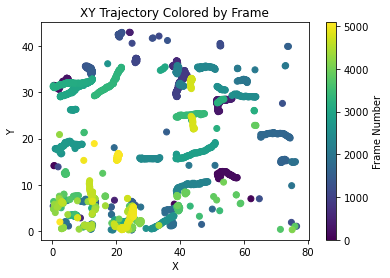

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis
from matplotlib.colors import Normalize

# Normalize frame numbers to use with the colormap
norm = Normalize(vmin=df['frame'].min(), vmax=df['frame'].max())

# Create a scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(df['X#wcentroid'], df['Y#wcentroid'], c=df['frame'], cmap='viridis', norm=norm)

# Add a colorbar to show the mapping from colors to frame numbers
cbar = plt.colorbar(sc)
cbar.set_label('Frame Number')

# Set labels and show plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('XY Trajectory Colored by Frame')